# Street Fighter 6 Ranked Match Analysis

## Introduction

Street Fighter 6 is a 2023 fighting game developed and published by Capcom, where characters engage in combat, aiming to deplete the opponent's health bar.

This project aims to obtain insight about the current state of the game and players' performance by analyzing the results of the matches played in the game. Particularly, we will focus on the following aspects:
- **Statistical analysis**: We will analyze the data distribution to understand the characteristics of the dataset.

- **Characters performance**: We will analyze the performance of each character in the game, to find out which characters are most popular by players with different ranks.

- **Player performance**: We will analyze the players' performance in the game, focusing on how the opponent's rank affects the player's performance.

- **Matchup analysis**: We will analyze the matchups between characters to better understand how the characters perform against each other.

- **Character Variety**: We will analyze the variety of characters used by a single player in their matches, focusing on how the number of characters used affects the player's performance.

- **Outcome prediction**: We will build a machine learning model to predict the outcome of a match based on the players' ranks and characters used.

Answering these questions will provide valuable insights into the game and its players, helping to understand the current state of the game and how players perform in it. This analysis can also help players improve their performance by understanding the factors that affect their performance in the game.

## Data
The dataset used in this project is a collection of match results from Street fighter 6, which includes information about the players, their ranks, characters used, and match outcomes. The dataset is available on Kaggle and can be accessed [here](https://www.kaggle.com/datasets/jlaw2013/street-fighter-6-ranked-matches-cleaned-up). 
The dataset contains a total of 1,196,670 rows and 9 columns, with each row representing a match between two players. The dataset includes matches played in ranked mode, which is a competitive mode where players are matched against others of similar skill level. It includes matches played between players of different ranks and characters, collected from the top players in the world by rank.

The dataset contains the following variables:

| Variable | Description | Data Type |
|--------|-------------|-----------|
| replay_id | Unique identifier for each match | string |
| p1_id | Unique identifier for player 1 | int |
| p1_mr | Rank of player 1 | int |
| p1_char | Character used by player 1 | string |
| p2_id | Unique identifier for player 2 | int |
| p2_mr | Rank of player 2 | int |
| p2_char | Character used by player 2 | string |
| p1_result | Result of player 1 (win/loss) | boolean |
| p2_result | Result of player 2 (win/loss) | boolean |


In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196670 entries, 0 to 1196669
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   replay_id  1196670 non-null  object
 1   p1_id      1196670 non-null  int64 
 2   p1_mr      1196670 non-null  int64 
 3   p1_char    1196670 non-null  object
 4   p2_id      1196670 non-null  int64 
 5   p2_mr      1196670 non-null  int64 
 6   p2_char    1196670 non-null  object
 7   p1_result  1196670 non-null  bool  
 8   p2_result  1196670 non-null  bool  
dtypes: bool(2), int64(4), object(3)
memory usage: 66.2+ MB


In [110]:
display(df.head())
print("Total number of matches:", len(df))

,replay_id,p1_id,p1_mr,p1_char,p2_id,p2_mr,p2_char,p1_result,p2_result
0,333486Q8P,3778180221,1594,Jamie,4291753364,1558,Juri,False,True
1,33357GMQ9,2879537192,1628,Terry,3837901719,1617,Jamie,True,False
2,3335ARP58,1126991366,1602,Zangief,1423650648,1569,Mai,False,True
3,3335ELVHT,1750765407,1569,Kimberly,1968834121,1552,Edmond Honda,True,False
4,3335FCXE3,1545148707,1599,A.K.I.,3026282111,1617,Mai,False,True


Total number of matches: 1196670


### Note on the ranking system
The ranking system in Street Fighter 6 is based on LP (Ladder Points), which is a numerical representation of a player's skill level. Players earn 50 LP by winning matches and lose 40 LP by losing matches, thus climbing through the ranks, where the last rank is Master. However, the ranking system for Master players is different, based on the MR (Master Rate) system, where points are calculated based on the difference between the player's MR and the MR of the opponent. The MR system is designed to ensure that players are matched against opponents of similar skill level, providing a fair and competitive experience.
The column `p1_mr` and `p2_mr` in the dataset represent the Master Rate of player 1 and 2, respectively. Players with a MR of 0 could possibly be in any rank below Master, but the dataset does not provide information about the exact rank of these players. To grant a better understanding of the analysis of this project, we will not consider the matches where both players have a MR of 0, as we cannot determine the rank of these players.

Also, note that every character played by a player have a unique MR value, which means that a player can have different MR values for different characters.

In [111]:
df = df[(df['p1_mr'] > 0) & (df['p2_mr'] > 0)]
print("Total number of matches with both players having MR > 0:", len(df))

Total number of matches with both players having MR > 0: 1119222


## Analysis

### Statistical analysis
In this section, we will analyze the distribution of the dataset. We will analyze frequency and measure central tendency, dispersion, and shape of the data, to understand how MR is distributed in the dataset.
We will also show the distribution of the characters used by players in the dataset, to understand which characters are most popular among players.

First we need to join the p1 and p2 columns to create a single dataframe with all the information about the players.


In [112]:
df_p1 = df[['replay_id', 'p1_id', 'p1_mr', 'p1_char', 'p1_result']].copy()
df_p1.columns = ['replay_id', 'player_id', 'mr', 'char', 'result']

df_p2 = df[['replay_id', 'p2_id', 'p2_mr', 'p2_char', 'p2_result']].copy()
df_p2.columns = ['replay_id', 'player_id', 'mr', 'char', 'result']

df_long = pd.concat([df_p1, df_p2])

df_long.info()
df_long.to_csv("data_long.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 2238444 entries, 0 to 1196669
Data columns (total 5 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   replay_id  object
 1   player_id  int64 
 2   mr         int64 
 3   char       object
 4   result     bool  
dtypes: bool(1), int64(2), object(2)
memory usage: 87.5+ MB


#### Master Rate distribution
Our first step is to analyze the distribution of the Master Rate (MR) of the players in the dataset. We will plot a histogram to visualize the distribution of MR values, and calculate some statistics to understand the central tendency and dispersion of the data.

We are going to define a new distribution, `average_mr_per_player`, which minimizes the influence of fluctuations in the MR between matches.

In [ ]:
avg_mr_per_player = df_long.groupby('player_id')['mr'].mean().reset_index().floordiv(1).astype(int)
avg_mr_per_player.columns = ['player_id', 'average_mr']
avg_mr_per_player.info()
display(avg_mr_per_player.head())

##### Central tendency

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
# Plotting the distribution of MR
axes[0].hist(df_long['mr'], color='green', bins=80, alpha=0.7)
axes[0].set_title('Distribution of Master Rate (MR)')
axes[0].set_xlabel('Master Rate (MR)')
axes[0].set_ylabel('Frequency')
# Plotting the distribution of average MR per player
axes[1].hist(avg_mr_per_player['average_mr'], color='blue', bins=80, alpha=0.7)
axes[1].set_title('Distribution of Average Master Rate (MR) per Player')
axes[1].set_xlabel('Average Master Rate (MR)')
axes[1].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# print mean and median and mode of MR
mr_mean = df_long['mr'].mean().round(0)
mr_median = df_long['mr'].median()
mr_mode = df_long['mr'].mode()[0]


# print mean and median and mode of average MR
avg_mr_mean = avg_mr_per_player['average_mr'].mean().round(0)
avg_mr_median = avg_mr_per_player['average_mr'].median()
avg_mr_mode = avg_mr_per_player['average_mr'].mode()[0]

table = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode'],
    'Global MR': [mr_mean, mr_median, mr_mode],
    'Avg MR': [avg_mr_mean, avg_mr_median, avg_mr_mode]
})

display(table)




The table above shows the difference between considering the MR of the player in every match played and the average MR of the player. We can see that median and mode are significantly lower when we consider the average MR of the player, which is a more accurate representation of the player's skill level. This is because the average MR doesn't take into account the outliers in the dataset, which are a representation of one time peaks and lows in the player's performance, and thus are not a good representation of the player's skill level. The average MR is a better representation of the player's skill level.

The mean is also lower. This is because usually players in a lower MR are less consistent and have a higher variance in their performance, which leads to a lower mean MR.



##### Dispersion

To better understand the differences between the two plots, we will also plot the ECDF (Empirical Cumulative Distribution Function) of the MR values. The ECDF shows the proportion of data points that are less than or equal to a given value.

In [ ]:
mr_ecdf = df_long['mr'].value_counts(normalize=True).sort_index().cumsum()

# ECDF per il Master Rate medio per giocatore
avg_mr_ecdf = avg_mr_per_player['average_mr'].value_counts(normalize=True).sort_index().cumsum()
# Creazione del grafico
plt.figure(figsize=(6, 4))
plt.plot(mr_ecdf.index, mr_ecdf.values, label='Global MR', linestyle='--', color='green', alpha=0.7)
plt.plot(avg_mr_ecdf.index, avg_mr_ecdf.values, label='Avg MR per Player', linestyle='--', color='blue', alpha=0.7)


plt.legend()
plt.xlabel("Master Rate (MR)")
plt.ylabel("Cumulative Probability")
plt.title("ECDF - MR Distribution Comparison")
plt.grid()
plt.show()

mr_max = df_long['mr'].max()
mr_min = df_long['mr'].min()
avg_mr_max = avg_mr_per_player['average_mr'].max()
avg_mr_min = avg_mr_per_player['average_mr'].min()
mr_std = df_long['mr'].std()
mr_var = df_long['mr'].var()
avg_mr_std = avg_mr_per_player['average_mr'].std()
avg_mr_var = avg_mr_per_player['average_mr'].var()

table = pd.DataFrame({
    'Statistic': ['Max', 'Min', 'Range', 'Std', 'Var'],
    'Global MR': [mr_max, mr_min, mr_max - mr_min, mr_std, mr_var],
    'Avg MR': [avg_mr_max, avg_mr_min, avg_mr_max - avg_mr_min, avg_mr_std, avg_mr_var]
})
display(table)



As we can see, both distributions have values that concentrate around the mean, which means that the standard deviation is small, and the data is not very dispersed. This could be due to the fact that players promoted to Master have an initial assigned MR of 1500, and a lot of players try different characters after reaching this rank. Further on this anlaysis we will analyze the Average MR only, which is a better representation of the player's skill level.

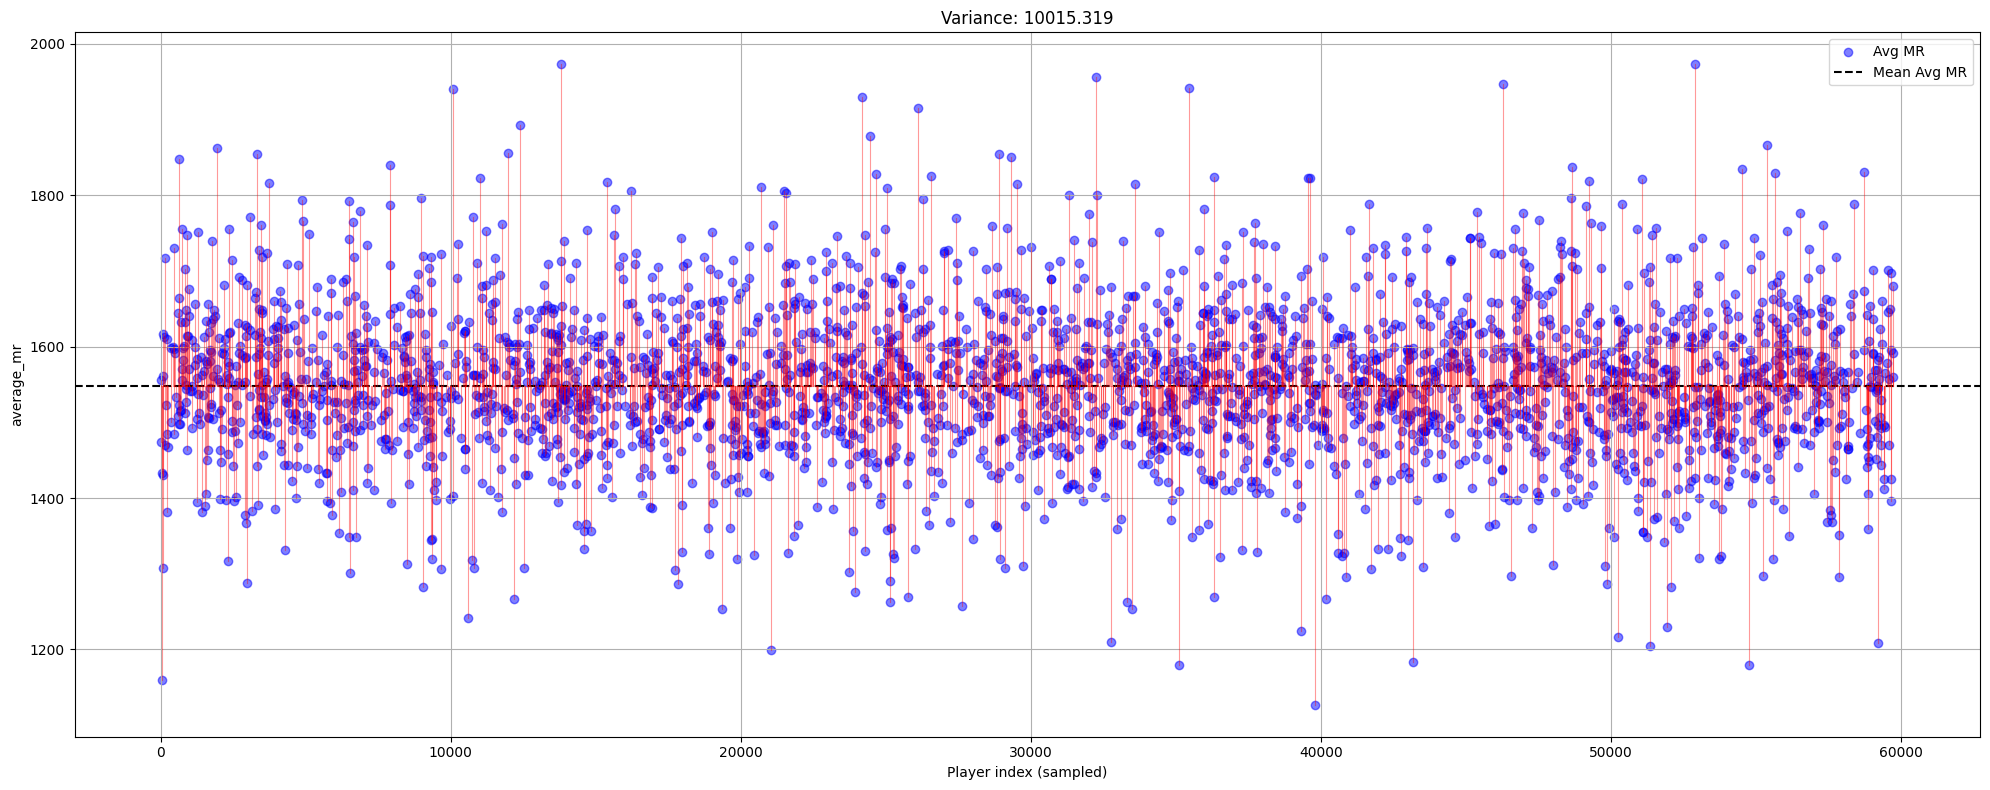

In [40]:
# Campionamento
df_sample = avg_mr_per_player.copy()
df_sample['y'] = range(len(df_sample))
df_sample = df_sample.sample(int(len(avg_mr_per_player)/20), random_state=66)

# Plot
plt.figure(figsize=(20, 8))
plt.scatter(df_sample['y'], df_sample['average_mr'], color='blue', label='Avg MR', alpha=0.5)
plt.axhline(avg_mr_mean, color='black', linestyle='--', label='Mean Avg MR')

for _, row in df_sample.iterrows():
    plt.plot([row['y'], row['y']], [row['average_mr'], avg_mr_mean], color='red', linewidth=0.8, alpha=0.4)

plt.title(f"Variance: {avg_mr_var:.3f}")
plt.xlabel("Player index (sampled)")
plt.ylabel("average_mr")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The plot above shows us that the majority of players have a MR value close to the mean, which is between 1400 and 1600 and the number of outliers, compared to the rest of the data, is low. It is important to note that the plot shows only a sample of the data because the dataset is too large to plot all the data points. The sample is representative of the data, as it contains a random sample of 5% of the data points.

##### Shape

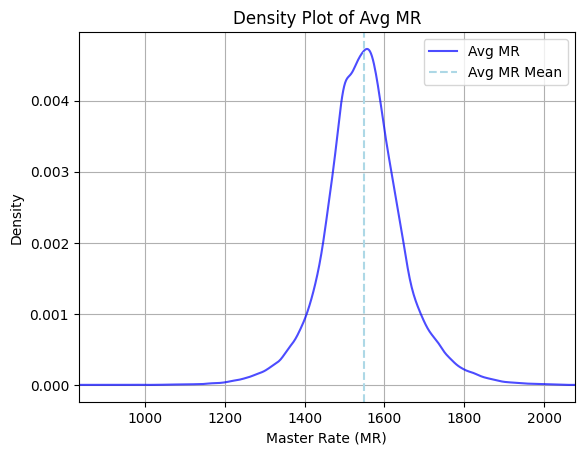

In [41]:
avg_mr_per_player['average_mr'].plot.density(color='blue', label='Avg MR', alpha=0.7)
plt.axvline(avg_mr_mean, color='lightBlue', linestyle='--', label='Avg MR Mean')
plt.xlim(avg_mr_min, avg_mr_max)
plt.title('Density Plot of Avg MR')
plt.xlabel('Master Rate (MR)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()



In [42]:
# skewness average MR
avg_mr_sk = avg_mr_per_player['average_mr'].skew()
# kurtosis average MR
avg_mr_kur = avg_mr_per_player['average_mr'].kurtosis()

table = pd.DataFrame({
    'Statistic': ['Skewness', 'Kurtosis'],
    'Avg MR': [avg_mr_sk, avg_mr_kur]
})
display(table)


,Statistic,Avg MR
0,Skewness,0.096176
1,Kurtosis,1.732991


From the plot above we can discuss about the distribution's skewness and kurtosis values. The skewness value is 0.09, which indicates that the distribution is slightly positively skewed. This means that there are more players with lower MR values than higher MR values. The kurtosis value is 1.73, which indicates that the distribution is leptokurtic, meaning that the distribution has a higher peak than a normal distribution. This means that there are more players with MR values close to the mean than in a normal distribution, which is consistent with the plot above. This could also indicate the presence of outliers in the dataset.

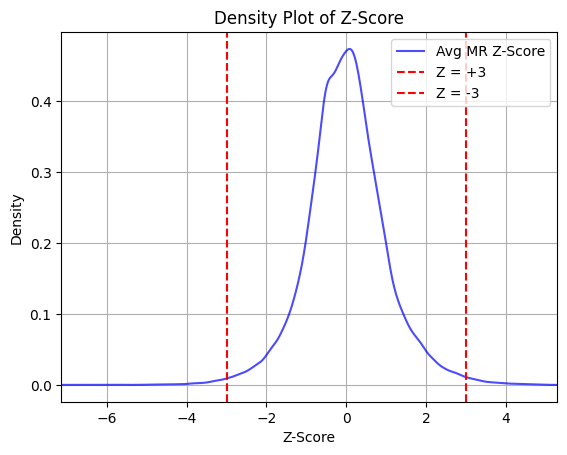

Outlier ±3 z-score: 1.15%


In [43]:
from scipy.stats import zscore

avg_mr_z = zscore(avg_mr_per_player['average_mr'])
avg_mr_z = pd.Series(avg_mr_z, index=avg_mr_per_player.index)
avg_mr_z.plot.density(color='blue', label='Avg MR Z-Score', alpha=0.7)

avg_mr_min_z = avg_mr_z.min()
avg_mr_max_z = avg_mr_z.max()

plt.axvline(3, color='red', linestyle='--', label='Z = +3')
plt.axvline(-3, color='red', linestyle='--', label='Z = -3')
plt.xlim(avg_mr_min_z, avg_mr_max_z)
plt.title('Density Plot of Z-Score')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Filtra gli outlier: z-score > 3 o < -3
outlier_mask = np.abs(avg_mr_z) > 3

# Calcola percentuale
outlier_percent = (outlier_mask.sum() / len(avg_mr_z)) * 100
print(f"Outlier ±3 z-score: {outlier_percent:.2f}%")


Our suspection is confirmed by looking at the Z-score values of the MR values. A Z-score outside the range of -3 to 3 indicates that the value is an outlier. The plot above shows that there are a few players with MR values outside this range. Since the outliers percentage is low, we can still consider them in our analysis.

#### Character usage distribution
This section will analyze the distribution of characters used by players in the dataset. To better understand the distribution, we are considering the most played character by each player as his main, and the rest of the characters as his secondaries.
The following bar plot visualizes the distribution of characters used by players, showing the usage percentage of each character divided into mains and secondaries.


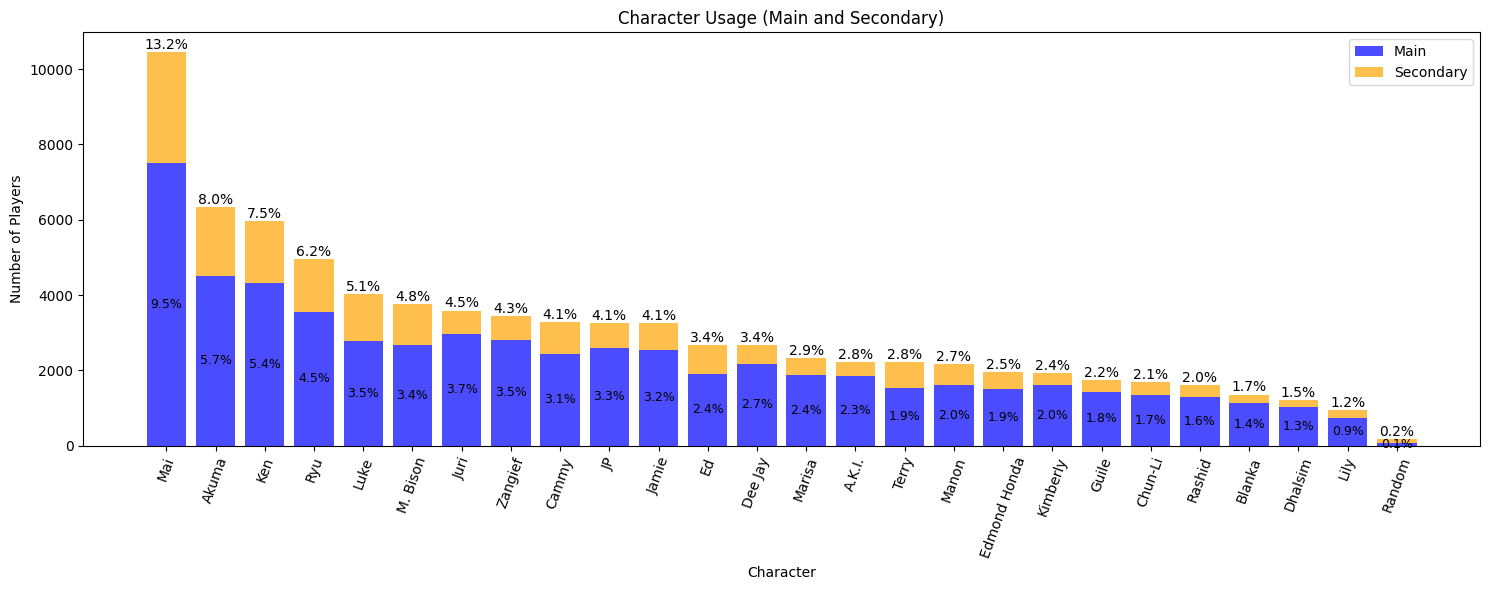

In [44]:
import matplotlib.pyplot as plt

# Calcola personaggi main e secondari per ogni giocatore
df_most_used = (
    df_long.groupby(['player_id', 'char'])
    .agg(mr=('mr', 'mean'), matches=('replay_id', 'count'))
    .reset_index()
)

# Main = personaggio con più match per ogni player
df_main = df_most_used.loc[df_most_used.groupby('player_id')['matches'].idxmax()]

# Secondary = tutti gli altri
df_secondary = df_most_used[~df_most_used.index.isin(df_main.index)]

# Conteggi
main_counts = df_main['char'].value_counts()
secondary_counts = df_secondary['char'].value_counts()

# Unione e riempimento zeri
all_chars = main_counts.index.union(secondary_counts.index)
main_counts = main_counts.reindex(all_chars, fill_value=0)
secondary_counts = secondary_counts.reindex(all_chars, fill_value=0)

# Totale e percentuali
total_counts = main_counts + secondary_counts
total_percent = total_counts / total_counts.sum() * 100
main_percent = main_counts / total_counts.sum() * 100

# Ordina per percentuale totale decrescente
sorted_chars = total_percent.sort_values(ascending=False).index
main_counts = main_counts[sorted_chars]
secondary_counts = secondary_counts[sorted_chars]
main_percent = main_percent[sorted_chars]
total_percent = total_percent[sorted_chars]

# Plot
fig, ax = plt.subplots(figsize=(15, 6))
ax.bar(sorted_chars, main_counts, label='Main', color='blue', alpha=0.7)
ax.bar(sorted_chars, secondary_counts, bottom=main_counts, label='Secondary', color='orange', alpha=0.7)

# Percentuali
for i, (m, s, mp, tp) in enumerate(zip(main_counts, secondary_counts, main_percent, total_percent)):
    if m > 0:
        ax.text(i, m/2, f'{mp:.1f}%', ha='center', va='center', fontsize=9)
    ax.text(i, m + s + 0.5, f'{tp:.1f}%', ha='center', va='bottom', fontsize=10)

# Decorazioni
ax.set_title('Character Usage (Main and Secondary)')
ax.set_xlabel('Character')
ax.set_ylabel('Number of Players')
ax.set_xticks(range(len(sorted_chars)))
ax.set_xticklabels(sorted_chars, rotation=70)
ax.legend()
plt.tight_layout()
plt.show()



As we can see, the most used character is "Mai" with 13.2% of the total matches, followed by "Akuma" with 8%, with a large difference between them. From the second to the last character, the difference is small, with the last character being "Random" (as a random selected character) with 0.2% of the total matches. This is probably due to the fact that "Mai" is a new character in the game, released in Feb 5, 2025, and this dataset was collected in March 2025.

We can see that the most used characters besides "Mai" are "Akuma", "Ken", "Ryu" and "Luke". These characters are popular among players, because they share the same playstyle as "shotos", which are known to rely on the very fundamental aspects of the game.

### Character performance based on Rank
In this section we will analyze the performance of each character based on the rank of the players using that character. Since players can use characters different from their main (which usually has the highest MR), for each player we are only going to consider the most used character. 

C:\Users\PCRic\AppData\Local\Temp\ipykernel_19836\2402152578.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=chars, patch_artist=True)


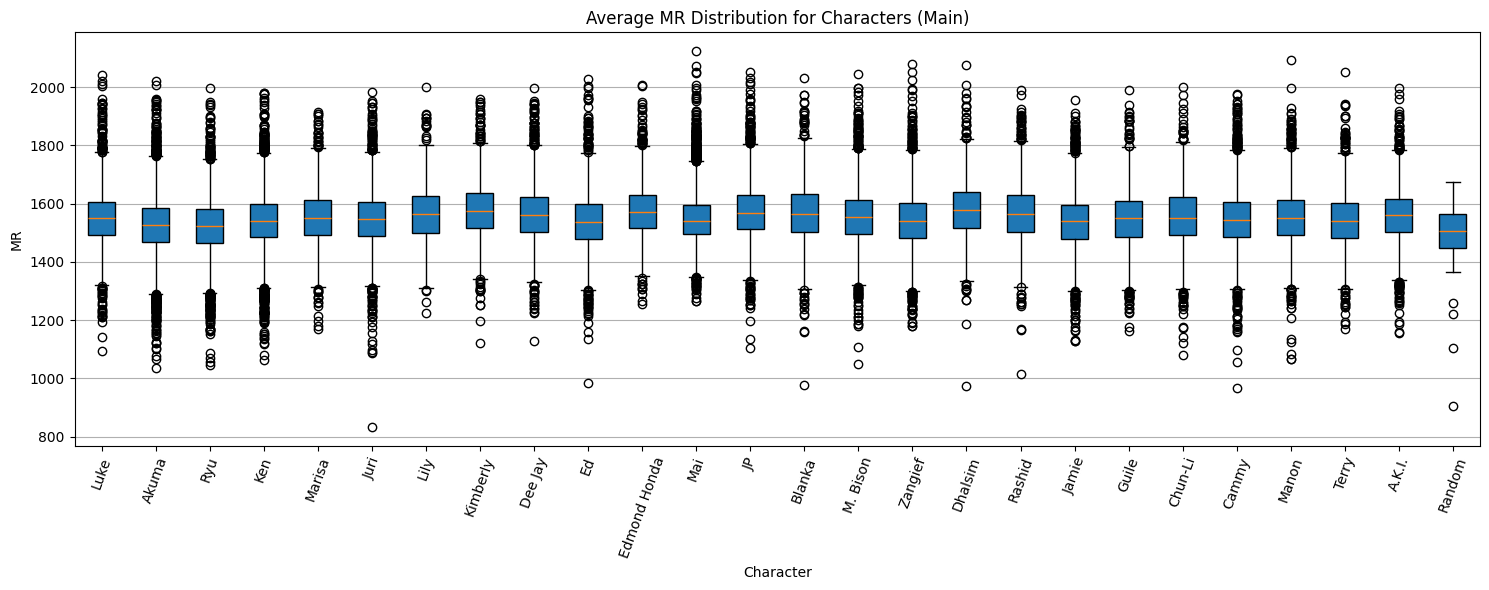

In [45]:
import matplotlib.pyplot as plt

# Prepara i dati: lista di array dei rank per ogni personaggio
chars = df_main['char'].unique()
data = [df_main[df_main['char'] == char]['mr'] for char in chars]

# Crea il boxplot
plt.figure(figsize=(15, 6))
plt.boxplot(data, labels=chars, patch_artist=True)
plt.title('Average MR Distribution for Characters (Main)')
plt.xlabel('Character')
plt.ylabel('MR')
plt.xticks(rotation=70)


plt.grid(axis='y')

plt.tight_layout()
plt.show()



We can see that all characters have a similar performance. This means that the game is balanced, and there are no characters that are significantly better than others. To better analyze the differences between characters, we will show the boxplots of the most and least used characters, which are "Mai" and "Lily", respectively.

C:\Users\PCRic\AppData\Local\Temp\ipykernel_19836\743543279.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  boxlot_data = plt.boxplot(data_minmax, labels=chars_minmax, patch_artist=True)


('Mai', 'Lily')


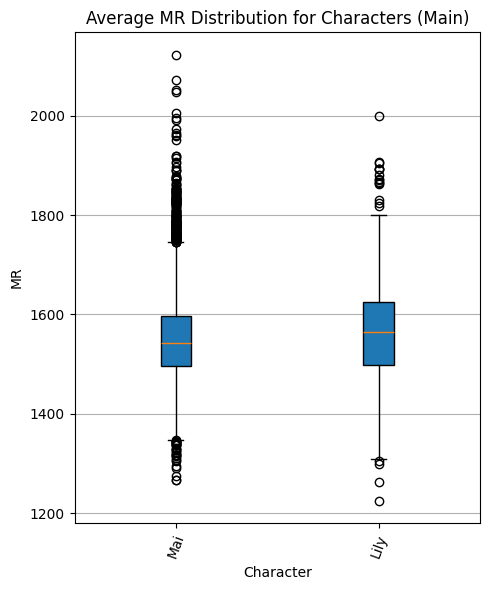

In [46]:
# filter data for the first character

data_minmax = data[11], data[6]
chars_minmax = chars[11], chars[6]
print(chars_minmax)

# Crea il boxplot
plt.figure(figsize=(5, 6))
boxlot_data = plt.boxplot(data_minmax, labels=chars_minmax, patch_artist=True)
plt.title('Average MR Distribution for Characters (Main)')
plt.xlabel('Character')
plt.ylabel('MR')
plt.xticks(rotation=70)
plt.grid(axis='y')
plt.tight_layout()
plt.show()




We can see that the most used character, "Mai", has a shorter IQR, which means that the MR values are more concentrated around the median. This means that players using "Mai" have a more consistent performance than players using "Lily", who have a higher IQR, which means that the MR values are more dispersed. Also, many outliers can be found at the upper end of "Mai"'s boxplot, which means that there are players with a very high MR using this character. 

As we can see, "Lily" does not have a good performance at high level, which means that players using this character are not able to reach high ranks. This is probably due to the fact that "Lily" is a simple character with a simple gameplan, which makes it easier to play at low level, but harder to play at high level because of the opponent's matchup knowledge. This also reflects her low usage percentage shown before.

### Player Performance

In this section we will determine if there is a correlation between the rank of the player and the opponent with respect to the match outcome. To achieve this, we will discretize the MR values into bins, and then we will do a chi-squared test.
Seven bins were created, ranging from 0 to 2000, with a bin size of 100. Lowest and highest bins were merged to avoid having too many bins with few data points.



In [47]:

bins = [0, 1400, 1500, 1600, 1700, 1800, 1900, 2300]
labels = [0, 1, 2, 3, 4, 5, 6] 
df_performance = df.copy()
df_performance['p1_mr_bin'] = pd.cut(df_performance['p1_mr'], bins=bins, labels=labels, right=False)
df_performance['p2_mr_bin'] = pd.cut(df_performance['p2_mr'], bins=bins, labels=labels, right=False)
df_performance['bin_diff'] = (df_performance['p1_mr_bin'].astype(int) - df_performance['p2_mr_bin'].astype(int)).abs()

df_performance['result'] = np.where(df_performance['p1_result'] & ~df_performance['p2_result'], 'p1', 'p2')

df_performance['stronger'] = np.where(df_performance['p1_mr'] - df_performance['p2_mr'] > 0, 'p1', 'p2')

df_performance['winner_is_stronger'] = np.where(df_performance['result'] == df_performance['stronger'], 1, 0)

df_performance.head()

,replay_id,p1_id,p1_mr,p1_char,p2_id,p2_mr,p2_char,p1_result,p2_result,p1_mr_bin,p2_mr_bin,bin_diff,result,stronger,winner_is_stronger
0,333486Q8P,3778180221,1594,Jamie,4291753364,1558,Juri,False,True,2,2,0,p2,p1,0
1,33357GMQ9,2879537192,1628,Terry,3837901719,1617,Jamie,True,False,3,3,0,p1,p1,1
2,3335ARP58,1126991366,1602,Zangief,1423650648,1569,Mai,False,True,3,2,1,p2,p1,0
3,3335ELVHT,1750765407,1569,Kimberly,1968834121,1552,Edmond Honda,True,False,2,2,0,p1,p1,1
4,3335FCXE3,1545148707,1599,A.K.I.,3026282111,1617,Mai,False,True,2,3,1,p2,p2,1


Below is shown the contingency table of the MR bin difference and the match outcome. The table shows the number of matches played between players with different MR bins, and the number of wins for each player.

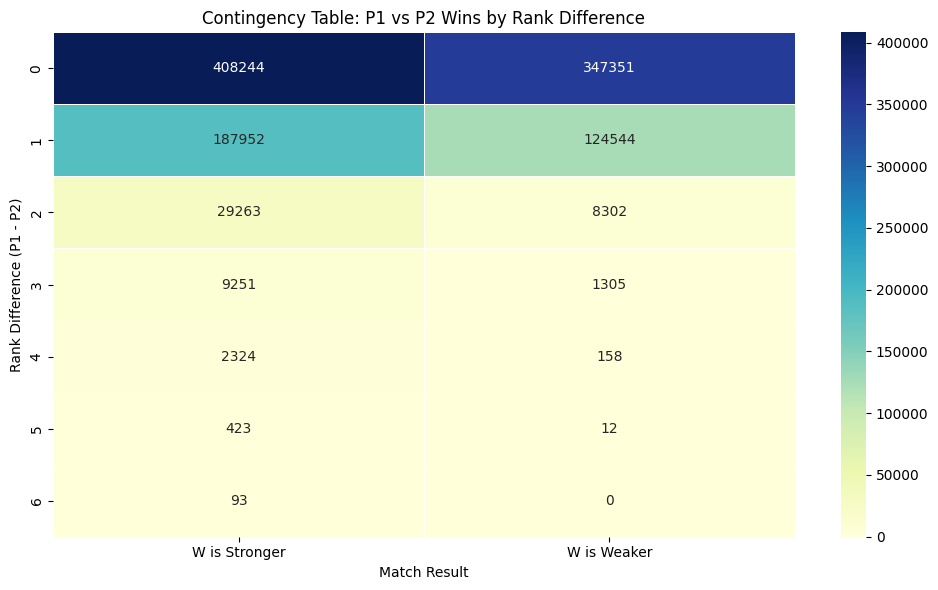

In [48]:
import seaborn as sns
contingency_table = pd.crosstab(df_performance['bin_diff'], df_performance['winner_is_stronger'])
contingency_table.columns = ['W is Stronger', 'W is Weaker']

plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu', linewidths=0.5, cbar=True)


plt.title('Contingency Table: P1 vs P2 Wins by Rank Difference')
plt.xlabel('Match Result')
plt.ylabel('Rank Difference (P1 - P2)')
plt.tight_layout()
plt.show()

Now we can proceed to do the chi-squared test. The null hypothesis is that there is no correlation between the MR bin difference and the match outcome. The alternative hypothesis is that there is a correlation between the MR bin difference and the match outcome.

In [49]:
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi² = {chi2:.2f}")
print(f"p-value = {p:.4f}")
print(f"Degrees of Freedom = {dof}")
contingency_table['total'] = contingency_table['W is Stronger'] + contingency_table['W is Weaker']


Chi² = 16431.35
p-value = 0.0000
Degrees of Freedom = 6


The Chi-squared value is 16431.35, which means that obsserved and expected values are significantly different. The p-value is 0.0, which means that we can reject the null hypothesis. We can state that there is a correlation between the MR bin difference and the match outcome. To get better evidence of this, we can also plot the proportion of wins for each MR bin difference. The plot below shows the probability of the highest MR player to win the match, based on the MR bin difference. The plot shows that the higher the MR bin difference, the higher the probability of winning for the player with the highest MR.

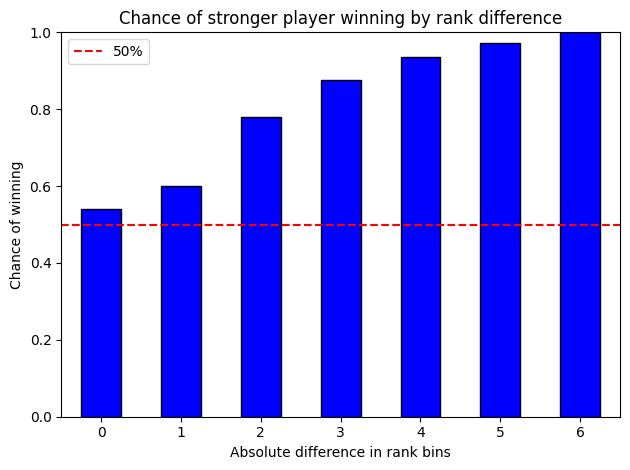

In [50]:
import matplotlib.pyplot as plt

# Calcolo percentuali
p_stronger_wins = contingency_table['W is Stronger'] / contingency_table['total']

# Plot
p_stronger_wins.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Chance of stronger player winning by rank difference')
plt.ylabel('Chance of winning')
plt.xlabel('Absolute difference in rank bins')
plt.ylim(0, 1)
plt.axhline(y=0.5, color='red', linestyle='--', label='50%')
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()
plt.show()



From a player's perspective, this effect may feel less pronounced. In actual gameplay, players often attribute wins and losses to factors like matchup familiarity, mistakes, or mind games. Also, the game is known to be too volatile, allowing weakest players to win against the strongest However, the data shows that MR still plays a strong and measurable role. This suggests that player skill, as measured by MR, is a reliable predictor of match outcome, even if it doesn't always feel that way from inside the match.

#### Matchup Analysis
In this section, we will analyze the matchups between characters to better understand how the characters perform against each other. We will create a matrix that shows the log-odds of each character winning against every other character. The log-odds is calculated as the logarithm of the ratio of the number of wins to the number of losses.

In [51]:
def compute_log_odds(row):
    a = row['char1_wins'] + 1
    b = row['char2_wins'] + 1
    return np.log(a / b)

def count_matchup_stats(df):
    matchup_stats = df.groupby(['char1', 'char2']).agg(
        char1_wins=('char1_win', 'sum'),
        char2_wins=('char2_win', 'sum')
    ).reset_index()
    matchup_stats['logodds'] = matchup_stats.apply(compute_log_odds, axis=1)

    reversed_stats = matchup_stats.rename(columns={'char1': 'char2', 'char2': 'char1', 'char1_wins': 'char2_wins', 'char2_wins': 'char1_wins'}).copy()
    reversed_stats['logodds'] = -reversed_stats['logodds']
    return matchup_stats, reversed_stats

def setup_matchup_stats(df, percentile_value=0):

    df_matchups = df[
        (df['p1_mr'] > percentile_value) & (df['p2_mr'] > percentile_value)
    ][['p1_char', 'p2_char', 'p1_result', 'p2_result', 'p1_mr', 'p2_mr']].copy()
    df_matchups = df_matchups[~df_matchups['p1_char'].isin(['Random']) & ~df_matchups['p2_char'].isin(['Random'])]

    df_matchups['char1'] = df_matchups[['p1_char', 'p2_char']].min(axis=1)
    df_matchups['char2'] = df_matchups[['p1_char', 'p2_char']].max(axis=1)

    df_matchups['char1_win'] = np.where(df_matchups['p1_char'] == df_matchups['char1'], df_matchups['p1_result'], df_matchups['p2_result'])
    df_matchups['char2_win'] = ~df_matchups['char1_win'] 
    return df_matchups

def display_matchup_heatmap(full_stats):
    # heatmap contingency table per log odds
    contingency_table = pd.crosstab(full_stats['char1'], full_stats['char2'], values=full_stats['logodds'], aggfunc='mean')

    plt.figure(figsize=(24, 16))
    sns.heatmap(contingency_table, annot=True, fmt='.2f', cmap='bwr', linewidths=0.5, cbar=True, center=0, square=True)
    plt.title('Log Odds Heatmap of Matchups')
    plt.xlabel('Character 2')
    plt.ylabel('Character 1')
    plt.tight_layout()
    plt.show()


Below, the contingency table showing the log-odds of each character winning against every other character is displayed as a heatmap.

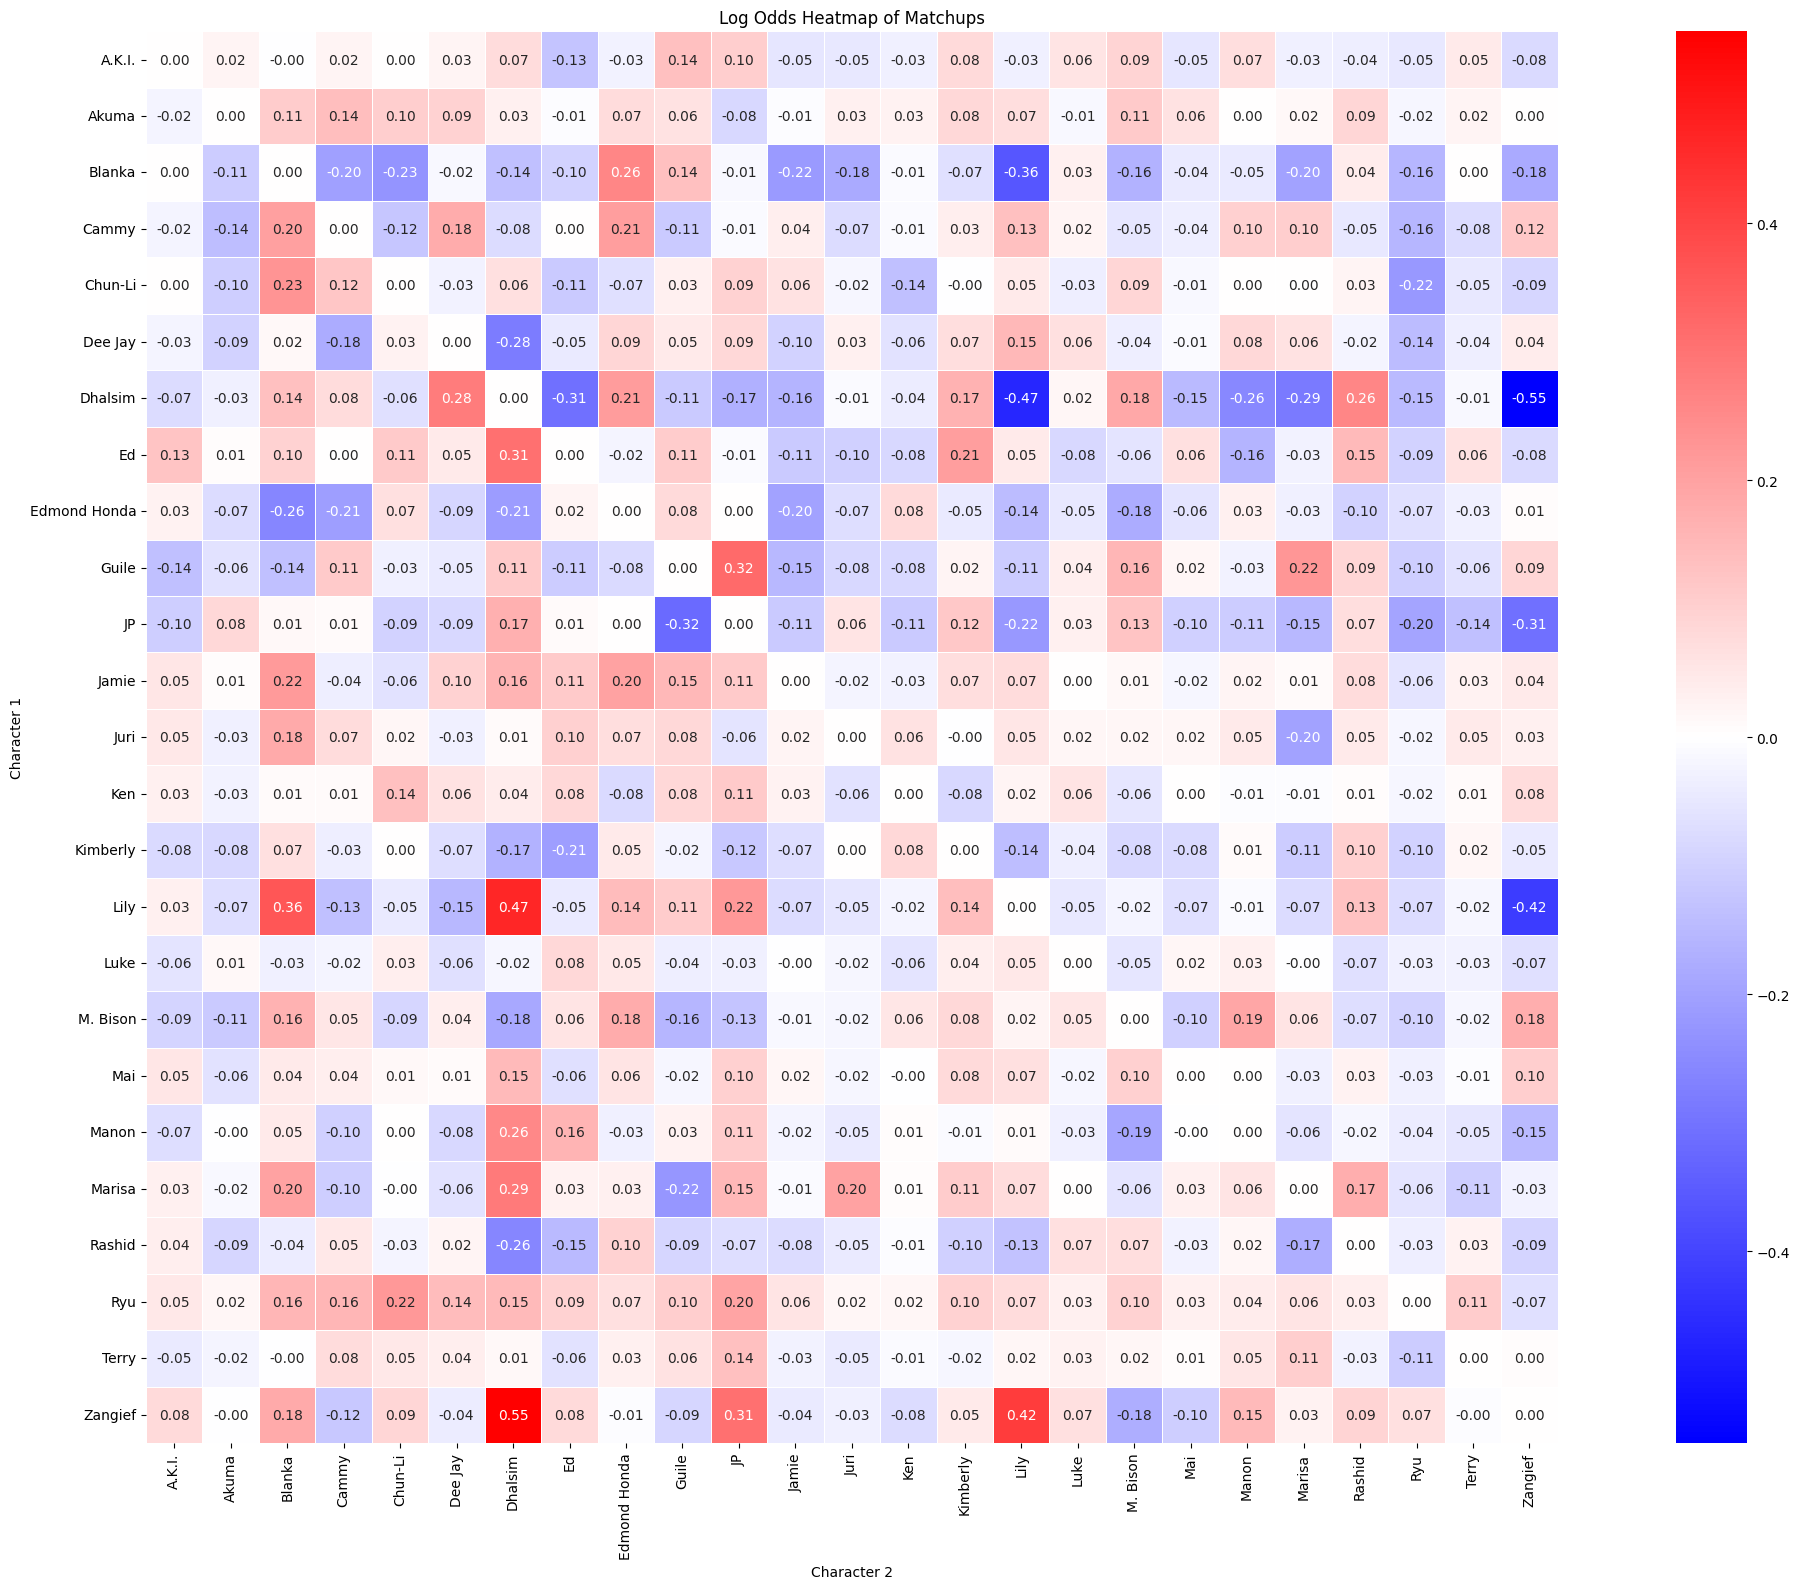

,char1,char2,char1_wins,char2_wins,logodds
478,Zangief,Dhalsim,1170,675,0.549420
469,Lily,Dhalsim,401,251,0.467023
604,Zangief,Lily,773,508,0.419124
387,Lily,Blanka,408,284,0.361226
190,Guile,JP,1337,969,0.321635
...,...,...,...,...,...
515,JP,Guile,969,1337,-0.321635
62,Blanka,Lily,284,408,-0.361226
279,Lily,Zangief,508,773,-0.419124
144,Dhalsim,Lily,251,401,-0.467023


In [52]:
df_matchups = setup_matchup_stats(df)
full_stats = pd.concat(count_matchup_stats(df_matchups), ignore_index=True)

display_matchup_heatmap(full_stats)

display(full_stats[(full_stats['char1'] != full_stats['char2'])].sort_values(by='logodds', ascending=False))

As we can see, the most unbalanced matchup is between "Zangief" and "Dhaslim", with a log-odds of 0.54. This values is small, which means that there is no significant advantage for either character. The log-odds values are generally small, which means that the matchups are balanced. This is a good sign for the game, as it means that the game is balanced and there are no characters that are overpowered.
From a player's perspective, I would say that the data does not respect the reality. In fact, the matchup "Dhalsim" vs "Zangief" is considered one of the most unbalanced matchups in the game, with "Zangief" having a significant disadvantage over "Dhaslim". This is because "Zangief" is a grappler character, which means that he relies on getting close to the opponent to deal damage, while "Dhaslim" is a zoner character, which means that he relies on keeping the opponent at a distance to deal damage.

For this reason, a better way to analyze the matchups is to consider the matches played by players with a higher MR, as those players are more skilled and are capable to maximize their character's potential.

Percentile value for MR > 97.5: 1874.0


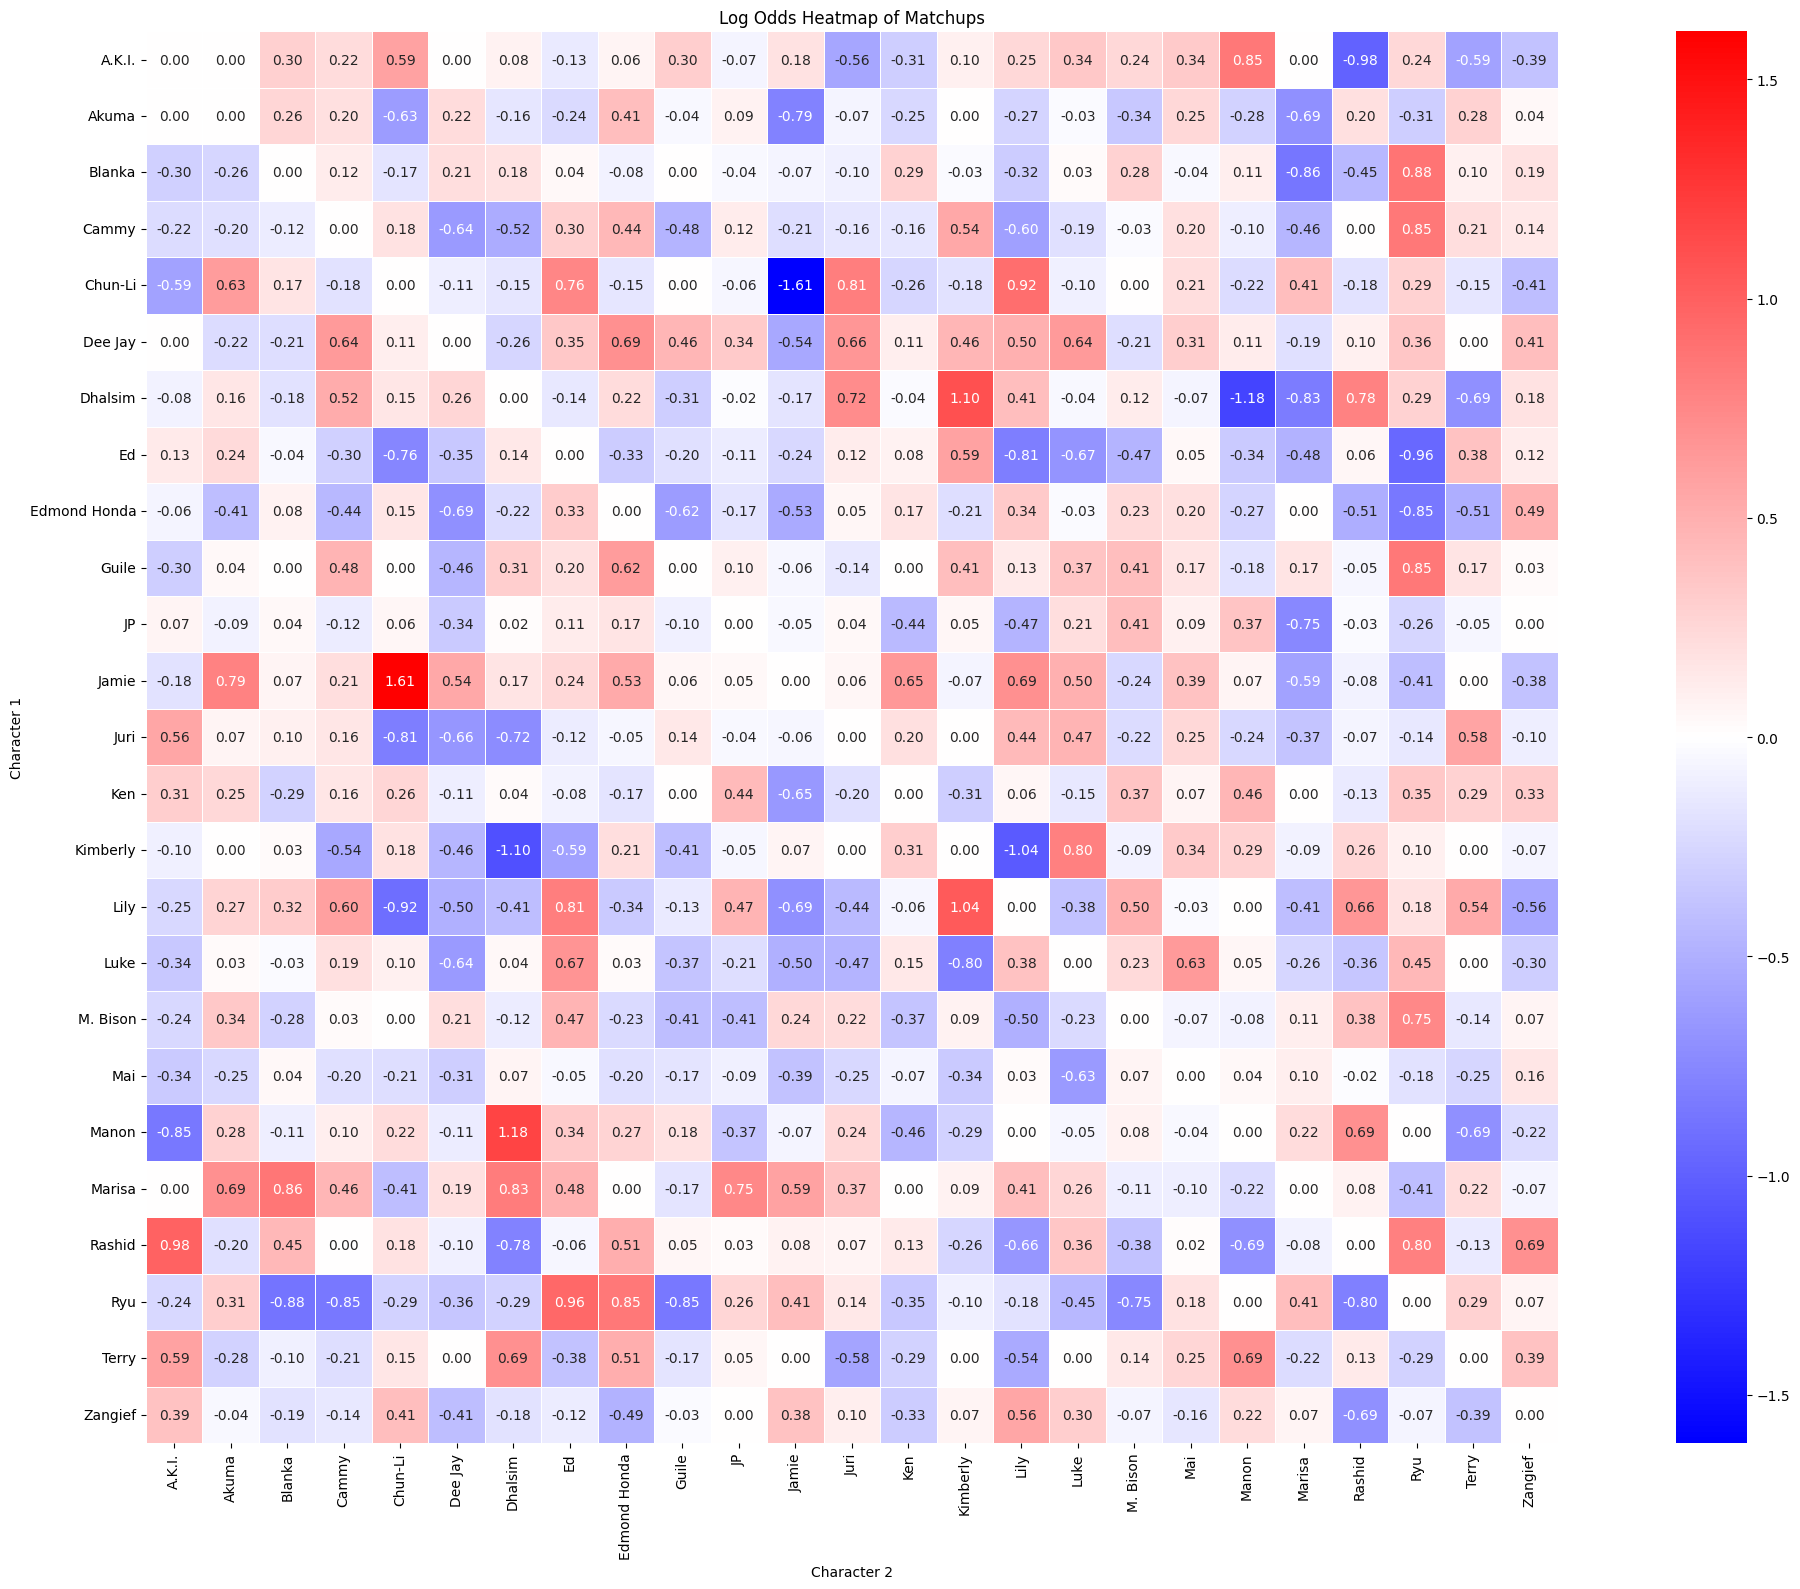

,char1,char2,char1_wins,char2_wins,logodds
426,Jamie,Chun-Li,9,1,1.609438
473,Manon,Dhalsim,25,7,1.178655
143,Dhalsim,Kimberly,14,4,1.098612
585,Lily,Kimberly,16,5,1.041454
346,Rashid,A.K.I.,15,5,0.980829
...,...,...,...,...,...
21,A.K.I.,Rashid,5,15,-0.980829
260,Kimberly,Lily,5,16,-1.041454
468,Kimberly,Dhalsim,4,14,-1.098612
148,Dhalsim,Manon,7,25,-1.178655


In [53]:
mr_percentile = 97.5
percentile_value = np.percentile(pd.concat([df['p1_mr'], df['p2_mr']]), mr_percentile)
print(f"Percentile value for MR > {mr_percentile}: {percentile_value}")
df_matchups = setup_matchup_stats(df, percentile_value)
full_stats = pd.concat(count_matchup_stats(df_matchups), ignore_index=True)

display_matchup_heatmap(full_stats)

display(full_stats[(full_stats['char1'] != full_stats['char2'])].sort_values(by='logodds', ascending=False))

In [54]:
display(full_stats[(full_stats['char1'] == 'Zangief') & (full_stats['char2'] == 'Dhalsim')])
display(full_stats[(full_stats['char1'] == 'Dhalsim') & (full_stats['char2'] == 'Zangief')])

,char1,char2,char1_wins,char2_wins,logodds
478,Zangief,Dhalsim,29,35,-0.182322


,char1,char2,char1_wins,char2_wins,logodds
153,Dhalsim,Zangief,35,29,0.182322


As we thought, the log-odds value favors "Dhalsim" over "Zangief" when we consider the matches played by players with a higher MR. However, it is necessary to note that the sample size of the matches played by players with a higher MR is small, which means that the log-odds values may not be fully reliable.

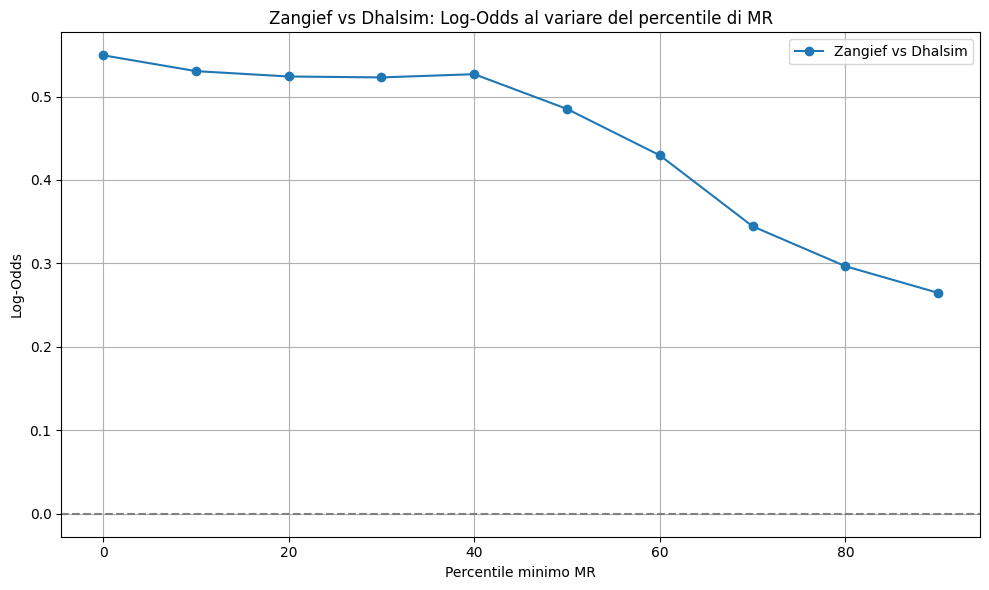

In [55]:
percentiles = np.arange(0, 100, 10)
logodds_values = []

for p in percentiles:
    threshold = np.percentile(pd.concat([df['p1_mr'], df['p2_mr']]), p)

    df_matchups = setup_matchup_stats(df, percentile_value=threshold)
    matchup_stats, reversed_stats = count_matchup_stats(df_matchups)
    full_stats = pd.concat([matchup_stats, reversed_stats], ignore_index=True)

    row = full_stats[
        ((full_stats['char1'] == 'Zangief') & (full_stats['char2'] == 'Dhalsim'))
    ]

    if row.empty:
        logodds_values.append(np.nan)
    else:
        logodds_values.append(row['logodds'].values[0])


plt.figure(figsize=(10, 6))
plt.plot(percentiles, logodds_values, marker='o', label='Zangief vs Dhalsim')
plt.axhline(0, color='gray', linestyle='--')
plt.xlabel("Percentile minimo MR")
plt.ylabel("Log-Odds")
plt.title("Zangief vs Dhalsim: Log-Odds al variare del percentile di MR")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [56]:
print(f"MR value for percentile > {mr_percentile}: {percentile_value}")
display(df[
    ((df['p1_char'] == 'Zangief') & (df['p2_char'] == 'Dhalsim') | 
    (df['p1_char'] == 'Dhalsim') & (df['p2_char'] == 'Zangief')) & 
    (df['p1_mr'] > percentile_value) & (df['p2_mr'] > percentile_value)])

# count number of different players


MR value for percentile > 97.5: 1874.0


,replay_id,p1_id,p1_mr,p1_char,p2_id,p2_mr,p2_char,p1_result,p2_result
3188,35E6FJDS3,2004241872,1895,Zangief,3535471030,1878,Dhalsim,False,True
9499,3A6YQ79GE,1213256182,2033,Zangief,2145840660,2069,Dhalsim,False,True
14779,3E88UQ5B9,2868804971,2059,Zangief,3833467565,2091,Dhalsim,True,False
29641,3RDSLKDNJ,2706476162,2012,Zangief,2145840660,2004,Dhalsim,True,False
33103,3TXLYLDA9,1493326188,1934,Dhalsim,2441549279,2011,Zangief,True,False
...,...,...,...,...,...,...,...,...,...
1035237,UX7VM4LQY,3833467565,2092,Dhalsim,2868804971,2020,Zangief,True,False
1104314,WP8XXLQTA,1213256182,2102,Zangief,2234633659,2007,Dhalsim,False,True
1161303,Y67F4MVSN,2778926938,1932,Dhalsim,2244677290,1908,Zangief,False,True
1162218,Y6TJDCHRP,2572226875,1902,Zangief,2336643469,1969,Dhalsim,True,False


#### Character Variety
In this section, we will analyze the variety of characters used by a single player in their matches, focusing on how the number of characters used affects the player's performance. The method used is the pearson correlation coefficient, which measures the linear correlation between two variables. The closer the coefficient is to 1 or -1, the stronger the correlation.

In [57]:
# from df_long, count number of different characters grouped by player_id, also calculate mean mr
char_counts = df_long.groupby('player_id')['char'].nunique().reset_index()
char_counts.columns = ['player_id', 'num_characters']
char_counts['mean_mr'] = df_long.groupby('player_id')['mr'].mean().reset_index(drop=True)

display(char_counts.head())

corr = char_counts["mean_mr"].corr(char_counts["num_characters"])

print(f"Correlation between mean MR and number of characters used: {corr:.2f}")

,player_id,num_characters,mean_mr
0,1000005257,2,1564.311927
1,1000094447,1,1486.333333
2,1000111176,1,1521.333333
3,1000116498,1,1511.333333
4,1000209901,2,1552.416667


Correlation between mean MR and number of characters used: 0.22


A correlation coefficient of 0.22 indicates a weak positive correlation between the mean MR and the number of characters used by a player. This means that players who use more characters tend to have a higher average MR, but the correlation is not strong enough to draw definitive conclusions. Below the correlation is shown through a scatter plot with a linear regression line and a Lowess smoothing line.

C:\Users\PCRic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\statsmodels\nonparametric\smoothers_lowess.py:226: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


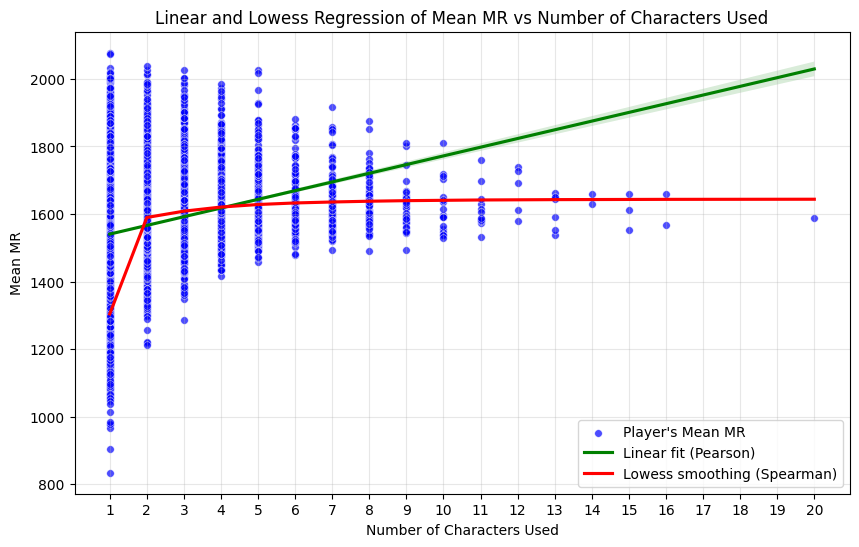

In [58]:
plt.figure(figsize=(10,6))

# Scatter plot
sns.scatterplot(
    data=char_counts,
    x="num_characters",
    y="mean_mr",
    s=30,
    alpha=0.7,
    color="blue",
    label="Player's Mean MR"
)

# regression line for linear fit
sns.regplot(
    data=char_counts,
    x="num_characters",
    y="mean_mr",
    scatter=False,
    color="green",
    label="Linear fit (Pearson)"
)

# Lowess smoothing line
sns.regplot(
    data=char_counts,
    x="num_characters",
    y="mean_mr",
    scatter=False,
    lowess=True,
    color="red",
    label="Lowess smoothing (Spearman)",
)

plt.title("Linear and Lowess Regression of Mean MR vs Number of Characters Used")
plt.xlabel("Number of Characters Used")
plt.ylabel("Mean MR")
plt.xticks(range(1, char_counts['num_characters'].max() + 1))
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


The correlation coefficient is low, so we use a Lowess smoothing line to better visualize the correlation. The plot shows that there is a big difference between the players who use only one character and those who use two, but after that the difference is small. This could mean that players who use more characters have a better understanding of the game's mechanics and are able to adapt to different situations, but the correlation is not strong enough to draw definitive conclusions.

## Prediction

In this section, we will build a machine learning model to predict the outcome of a match based on the players' ranks and characters used. The model will be trained on the dataset and will be able to predict the outcome of a match based on the players' ranks and characters used.

The models can be found at './models/' and the code at './winner_predictor.py'

below the best result is shown.


In [103]:
#setup
import torch
import pandas as pd
from models.LogisticCatModelOneHot import LogisticCatModelOneHot
from torch.utils.data import DataLoader

df_full = pd.read_csv("data.csv")
df_full = df_full[(df_full['p1_mr'] > 0) & (df_full['p2_mr'] > 0)]
test_indices = torch.load("test_indices.pt")

df_test_full = df_full.iloc[test_indices].reset_index(drop=True)


log_df = pd.read_csv("./lightning_logs/sf6analisys_/Final_onehot/metrics.csv")
df_epoch = log_df.groupby("epoch").sum().reset_index()


model = LogisticCatModelOneHot.load_model_from_checkpoint(checkpoint_path="./lightning_logs/sf6analisys_/Final_onehot/checkpoints/epoch=27-step=342776.ckpt")
model.eval()
model.freeze()
test_dataset = torch.load("test_dataset.pt", weights_only=False)

test_loader = DataLoader(test_dataset, batch_size=64, num_workers=4, persistent_workers=True)

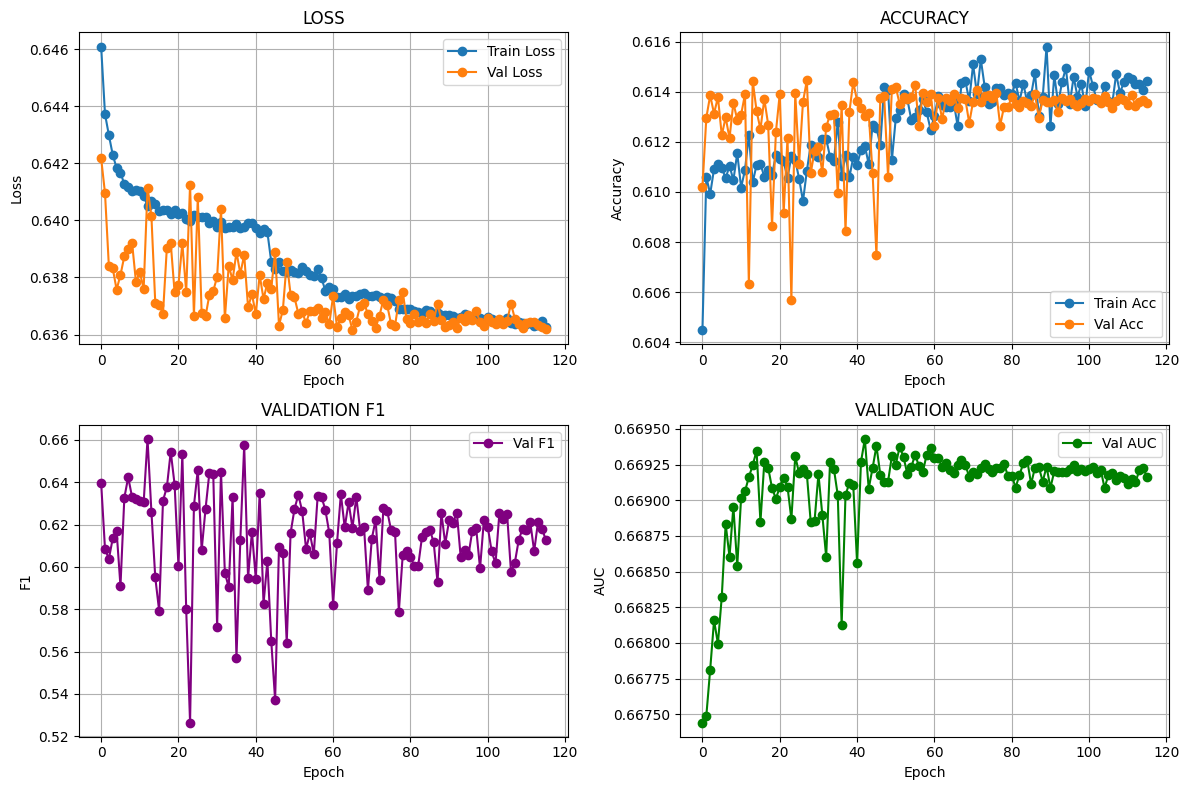

In [104]:


fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Loss
axes[0, 0].plot(df_epoch["epoch"], df_epoch["train_loss"], label="Train Loss", marker="o")
axes[0, 0].plot(df_epoch["epoch"], df_epoch["val_loss"], label="Val Loss", marker="o")
axes[0, 0].set_title("LOSS")
axes[0, 0].set_xlabel("Epoch")
axes[0, 0].set_ylabel("Loss")
axes[0, 0].legend()
axes[0, 0].grid(True)

# Accuracy
axes[0, 1].plot(df_epoch["epoch"], df_epoch["train_acc"], label="Train Acc", marker="o")
axes[0, 1].plot(df_epoch["epoch"], df_epoch["val_acc"], label="Val Acc", marker="o")
axes[0, 1].set_title("ACCURACY")
axes[0, 1].set_xlabel("Epoch")
axes[0, 1].set_ylabel("Accuracy")
axes[0, 1].legend()
axes[0, 1].grid(True)

# Validation F1
axes[1, 0].plot(df_epoch["epoch"], df_epoch["val_f1"], label="Val F1", marker="o", color="purple")
axes[1, 0].set_title("VALIDATION F1")
axes[1, 0].set_xlabel("Epoch")
axes[1, 0].set_ylabel("F1")
axes[1, 0].legend()
axes[1, 0].grid(True)

# Validation AUC
axes[1, 1].plot(df_epoch["epoch"], df_epoch["val_auc"], label="Val AUC", marker="o", color="green")
axes[1, 1].set_title("VALIDATION AUC")
axes[1, 1].set_xlabel("Epoch")
axes[1, 1].set_ylabel("AUC")
axes[1, 1].legend()
axes[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [105]:
all_preds = []
all_probs = []
all_labels = []

device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)          # sposta il modello sulla GPU
model.eval()
model.freeze()

with torch.no_grad():
    for x, y in test_loader:
        x, y = x.to(device), y.to(device)
        logits = model(x)
        probs = torch.sigmoid(logits)
        preds = (probs >= 0.5).int().squeeze(-1)  # squeeze solo l'ultima dimensione
        all_probs.append(probs.cpu())
        all_preds.append(preds.cpu())  # deve essere Tensor
        all_labels.append(y.cpu()) 
all_probs_tensor = torch.cat(all_probs).flatten()
all_preds_tensor = torch.cat(all_preds).flatten()
all_labels_tensor = torch.cat(all_labels).flatten()

In [106]:
print(len(all_labels_tensor))
print(len(all_preds_tensor))
print(len(all_probs_tensor))

167884
167884
167884


Confusion Matrix:
 tensor([[48168, 35536],
        [29360, 54820]])


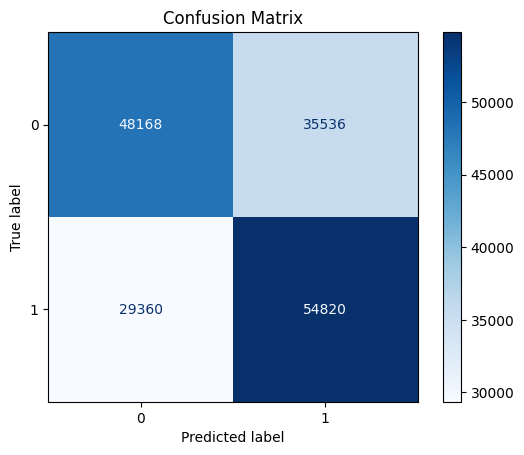

In [107]:
import torchmetrics
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
all_preds_cf = torch.cat(all_preds, dim=0)
all_labels_cf = torch.cat(all_labels, dim=0)
all_probs_cf = torch.cat(all_probs, dim=0)
confmat = torchmetrics.ConfusionMatrix(task="binary", num_classes=2)
cm = confmat(all_preds_cf, all_labels_cf)

print("Confusion Matrix:\n", cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm.numpy(), display_labels=[0,1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [108]:
low_threshold = 0.001
high_threshold = 0.999

mask_extreme = (all_probs_tensor <= low_threshold) | (all_probs_tensor >= high_threshold)
extreme_df = df_test_full.iloc[mask_extreme.numpy()].copy()
extreme_df["pred_prob"] = all_probs_tensor[mask_extreme].numpy()
extreme_df["pred_label"] = all_preds_tensor[mask_extreme].numpy()
display(extreme_df)
print(f"Numero di record estremi: {extreme_df.shape[0]}")

,replay_id,p1_id,p1_mr,p1_char,p2_id,p2_mr,p2_char,p1_result,p2_result,pred_prob,pred_label
128,BT9VY6TDX,1999009321,1680,Dhalsim,1900199925,1422,Lily,False,True,0.000722,0
2590,9D99XX4WF,1355312148,1811,Dhalsim,4052340997,1425,Akuma,False,True,0.000973,0
2611,WFMS78VXK,3977971107,1637,Jamie,4099560210,1465,JP,False,True,0.000889,0
2664,9WUQMC7PW,2025732639,1554,Edmond Honda,1650888195,1592,Lily,True,False,0.999781,1
3287,59CA89GSQ,3632331867,1496,Zangief,1793569272,1462,Zangief,True,False,0.999054,1
...,...,...,...,...,...,...,...,...,...,...,...
163096,GBB9VPACY,2601439854,1576,Dhalsim,1297591366,1467,Guile,False,True,0.000787,0
164585,PJTJBBNYX,4098628504,1766,Jamie,3084084224,1415,Ken,False,True,0.000808,0
166260,7KNV54TNU,3286818931,1662,Ken,2652869283,1420,Ken,False,True,0.000033,0
167229,SNRFT3AEW,2094539153,1533,Edmond Honda,2772229689,1319,Lily,False,True,0.000852,0


Numero di record estremi: 159


We can notice that the first 3 matches on the list have a high MR difference. For the 4th match, 9WUQMC7PW, we are going to show the player's winrate on the full dataset.

In [ ]:
winner = 2025732639
loser = 1650888195

loser_count = df_long[(df_long['player_id'] == loser)].count()
winner_count = df_long[(df_long['player_id'] == winner)].count()
loser_wins = df_long[(df_long['player_id'] == loser)]['result'].sum()
winner_wins = df_long[(df_long['player_id'] == winner)]['result'].sum()
loser_wr = loser_wins / loser_count
winner_wr = winner_wins / winner_count

print("loser's count = ", loser_count)
print("winner's count = ", winner_count)
print("loser's wins = ", loser_wins)
print("winner's wins = ", winner_wins)
print("loser's Winrate = ", loser_wr)
print("winner's Winrate = ", winner_wr)


replay_id    10
player_id    10
mr           10
char         10
result       10
dtype: int64
0.0


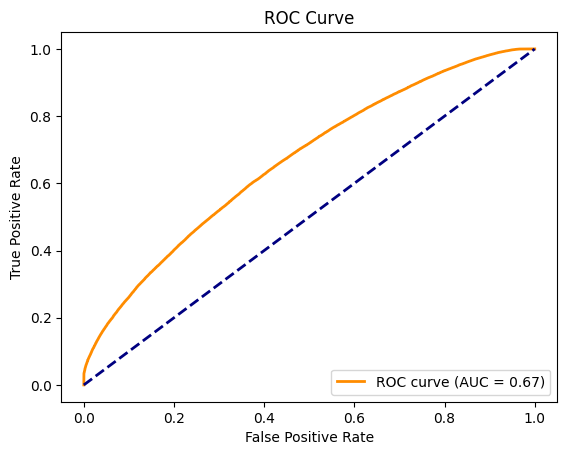

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


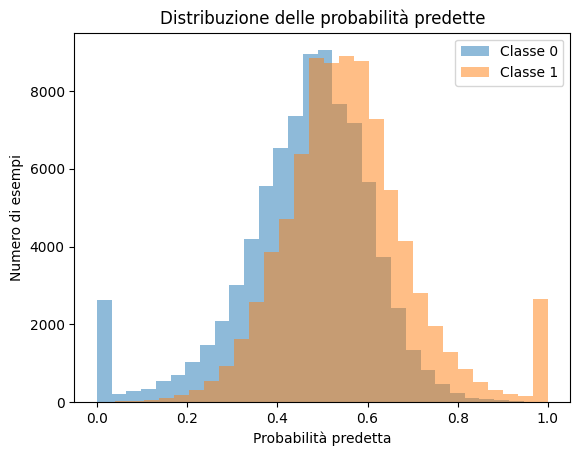

In [51]:
plt.figure()
plt.hist(all_probs[all_labels==0], bins=30, alpha=0.5, label='Classe 0')
plt.hist(all_probs[all_labels==1], bins=30, alpha=0.5, label='Classe 1')
plt.xlabel('Probabilità predetta')
plt.ylabel('Numero di esempi')
plt.title('Distribuzione delle probabilità predette')
plt.legend()
plt.show()

In [77]:
all_probs_tensor = torch.cat(all_probs)  # ora è un tensore 1D o 2D
all_preds_tensor = torch.cat(all_preds)
all_labels_tensor = torch.cat(all_labels)
mask = (all_probs_tensor <= 0.001) | (all_probs_tensor >= 0.999)
extreme_df = df_test_full[mask.numpy()]
display(extreme_df)


TypeError: cat(): argument 'tensors' (position 1) must be tuple of Tensors, not Tensor